- Dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


In [ ]:
# Get access to the folder with file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import libraries for dataset import and its processing
import pandas as pd
import nltk
import re

# Set the maximum width of columns in displaying data 
pd.set_option('display.max_colwidth', 999)

In [ ]:
# Read first dataset with fake news
df_fake = pd.read_csv('Fake.csv')

# Read second dataset with true news
df_true = pd.read_csv('True.csv')

In [ ]:
# Add new column 'label' and fill it with '1' with fake news
df_fake['label'] = 1

# Get rid of columns 'subjectt and 'date' as they are not needed for the model training
df_fake.drop(['subject','date'], axis=1, inplace=True)

# preview first five entries
df_fake[:5]

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won ...",1
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but tea...",1
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me, the former sheriff tweeted. I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and disc...",1
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, bu

In [ ]:
# Add new column 'label' and fill it with '0' with true news
df_true['label'] = 0

# Get rid of columns 'subjectt and 'date' as they are not needed for the model training
df_true.drop(['subject','date'], axis=1, inplace=True)

# preview first five entries
df_true[:5]

,title,text,label
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support ed...",0
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condit...",0
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.” The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January...",0
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four curren

In [ ]:
# Concatenate both datasets to get whole vocabulary
df_all = pd.concat([df_fake,df_true])

# Concatenate title and text together 
df_all['text'] = df_all['title'] + df_all['text']
df_all.drop('title', axis=1, inplace=True)

# Preview of new dataset
df_all

,text,label
0,"Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is DisturbingDonald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like th...",1
1,"Drunk Bragging Trump Staffer Started Russian Collusion InvestigationHouse Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that ...",1
2,"Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me, the former sheriff tweeted. I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked b...",1
3,"Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf: Unlike Obama, we are working to fix the problem and not on the golf course. However, the coding wasn t done correctly.The website of Donald Tr

# Cleaning and pre-processing text:

In [ ]:
# Create a new Porter stemmer
ps = nltk.stem.PorterStemmer()

# Download package with stopwords from natural language toolkit
nltk.download('stopwords')

# Get stopwords in English language
stop_words = nltk.corpus.stopwords.words('english')

# Define a function that will process each row and do next pre-process with it:
# 1. delete all non-alphabetical symbols
# 2. write to lowercase and split row into a list of words
# 3. check if word not a stop word
# 4. steam a word and concatenate it to newly row  
def cleanup(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    return ' '.join([ps.stem(word) for word in text.lower().split() if word not in stop_words])

# By applying function cleanup to each row in column 'text' get a new dataset with processed text od news
text = df_all['text'].apply(cleanup)

# Preview result
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        donald trump send embarrass new year eve messag disturbingdonald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov 

# Text vectorization by using Bag-of-words:

In [ ]:
# Import needed classes from sklearn library 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Convert a text to a matrix of token counts

vectorizer = CountVectorizer()

#Learn the vocabulary dictionary and return document-term matrix
text_transformed = vectorizer.fit_transform(text.values)

# Classification labels
labels = df_all['label']

# Devide data into testing and training samples, let's take 20% for testing
xtrain, xtest, ytrain, ytest = train_test_split(text_transformed,labels,test_size=0.2,random_state=34)
print('\nTotal number of samples in the Train Dataset :',xtrain.shape[0])
print('Total number of samples in the Test Dataset :',xtest.shape[0])


Total number of samples in the Train Dataset : 35918
Total number of samples in the Test Dataset : 8980


#Naive Bayes classifier
Naive Bayes model is based on Bayes’s Theorem, which helps us compute the conditional probabilities of the occurrence of two events, based on the probabilities of the occurrence of each individual event. So we’re calculating the probability of each tag for a given text, and then outputting the tag with the highest probability.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Fit Naive Bayes classifier according to xtrain and ytrain
bnb_model = BernoulliNB().fit(xtrain,ytrain)

# Perform classification on an array of test vectors Xtest
bnb_prediction = bnb_model.predict(xtest)

# XGBoost (Extreme Gradient Boosting)
XGBoost represents the model of decision tree ensembles, which consists of a set of classification and regression trees.

In [ ]:
import xgboost as xgb

# Build data matrix used in XGBoost
xgb_train = xgb.DMatrix(xtrain, ytrain)
xgb_test = xgb.DMatrix(xtest)

# Set Booster parameters
# Objective 'multi:softmax' seems to be the most sutable for this classification task,
# as news can be classified oly into 2 types, set num_class equal 2 
# As the binary classification on big data set doesn't seem to be a problem for XGBoost model,
# Regarding max depth parameter, don't think that for task of binary classification
# algorithm must be too complex, so I set depth to 5
param = {
          'max_depth': 5,
          'objective' : 'multi:softmax',
          'num_class' : 2
        }
# Set number of boosting iterations
epochs = 10 

# Train the model with given parameters
xgb_model = xgb.train(param, xgb_train, epochs)

# Perform classification on test dmatrix xgb_test
xgb_prediction = xgb_model.predict(xgb_test)

# Support vector machines
SVM is supervised learning model which algorithm constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification tasks.

In [ ]:
from sklearn import svm

# For binary classification task, the default parameters are enough
# only kernel must be specified, I think, again for such task just linearization 
# should be enough 
svm_model = svm.SVC(kernel='linear')

# Fit the SVM model according to the given training data
svm_model.fit(xtrain,ytrain)

# Perform classification on samples in test dataset
svm_prediction = svm_model.predict(xtest)



Naive Bayes model

Accuracy score : 0.9678173719376392
Classification report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      4270
           1       0.96      0.97      0.97      4710

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980


Confusion matrix:


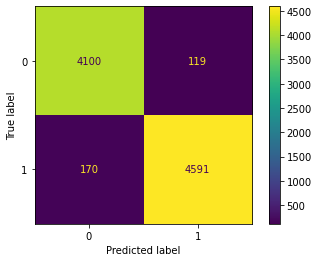



XGBoost

Accuracy score : 0.9975501113585746
Classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4225
         1.0       1.00      1.00      1.00      4755

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion matrix:


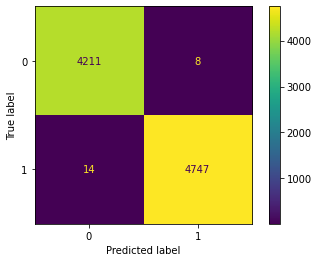



Support vector machines

Accuracy score : 0.9946547884187082
Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4213
           1       1.00      0.99      0.99      4767

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion matrix:


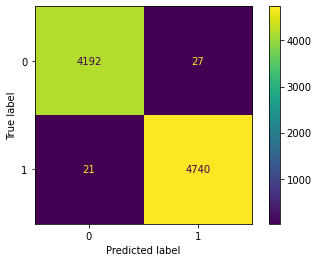

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Print out for each model scores and dispay confusion matrix
def printInfo(model_prediction):
  print('\033[4m' +'\nAccuracy score :'+ '\033[0m' ,accuracy_score(ytest,model_prediction))
  print('\033[4m'+'Classification report:\n\n'+ '\033[0m',classification_report(model_prediction,ytest))
  print('\nConfusion matrix:')
  cm = confusion_matrix(ytest, model_prediction, labels=[0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0, 1])
  disp.plot()
  plt.show()

print('\033[1m' + '\n\nNaive Bayes model' + '\033[0m')
printInfo(bnb_prediction)

print('\033[1m' +'\n\nXGBoost'+'\033[0m')
printInfo(xgb_prediction)

print('\033[1m' +'\n\nSupport vector machines'+'\033[0m')
printInfo(svm_prediction)

#Summary:

Binary text classification is pretty old task in ML and AI world and has been solved already by many models, so I didn't want to complicate the solution and decided to use 'classical' models for such task: Naive Bayes and Support Vector Machines. As third model I added 'almighty' XGBoost model, as this model usually shows very high scores, was interesting to see how much it will win over the classic and older models. I considered to choose some model from deep learning, but in the end I decided to give up the idea as the input dataset is quite voluminous and would require a lot of resources and time to set up all parameters for better preformance (even with resampling). 

So after training and prediction phases for all three models, unsurprisingly XGBoost showed best metrics. To be honest, the metrics are too high, probably I overfit the model. And if I had more time, I would do more experiments like taking less training data (now it's 80% of dataset) and would try to test models with the data that wasn't in the input dataset (so to say, 'uknown' for models). Another option is to manipulate with parameters for XGBoost and SVM but, again, for binary classification task, I would assume, there are not so many options. I think, if it was a productive task, I would stick to SVM or XGboost as they have more flexibility in compare to Naive Bayes.